In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age : int 
    final : str

In [8]:
def first_node(state:AgentState) -> AgentState:
    """This is the first node in the sequential agent."""
    state["final"] = f"Hi {state['name']}, Nice to meet you!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node in the sequential agent."""
    state["final"] = state["final"] +f" You are {state['age']} years old!"
    return state

In [9]:
graph = StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.set_finish_point("second")

app = graph.compile()

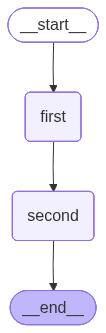

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"name": "Alice", 
                     "age": 30, "final": ""})

In [12]:
result

{'name': 'Alice',
 'age': 30,
 'final': 'Hi Alice, Nice to meet you! You are 30 years old!'}